<a href="https://colab.research.google.com/github/pankjb/Data-Science/blob/main/DL_Dog_vs_Cat_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!pip install kaggle
#installing kaggle library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
#configuring path of kaggle.json files
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing dataset from kaggle

In [39]:
#kaggle api
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [40]:
#extracting compressed dataset
from zipfile import ZipFile
dataset = ['/content/dogs-vs-cats.zip', '/content/train.zip', '/content/test1.zip']

for data in dataset:
  with ZipFile(data, 'r') as zip:
  #mode = r ie read-only
    zip.extractall()
print('The dataset is extracted')

The dataset is extracted


In [52]:
import os
#counting no of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing number of images

In [42]:
file_names = os.listdir('/content/train')
print(file_names)

['dog.9958.jpg', 'cat.904.jpg', 'dog.12349.jpg', 'cat.10143.jpg', 'cat.10590.jpg', 'dog.456.jpg', 'dog.4331.jpg', 'cat.7010.jpg', 'dog.6332.jpg', 'dog.1350.jpg', 'dog.1647.jpg', 'cat.10270.jpg', 'dog.5432.jpg', 'cat.2211.jpg', 'dog.8316.jpg', 'dog.5483.jpg', 'dog.4610.jpg', 'cat.5117.jpg', 'cat.9053.jpg', 'dog.3490.jpg', 'dog.3509.jpg', 'cat.11413.jpg', 'dog.8092.jpg', 'cat.6387.jpg', 'cat.7095.jpg', 'cat.838.jpg', 'cat.907.jpg', 'cat.9472.jpg', 'cat.449.jpg', 'cat.9429.jpg', 'cat.3214.jpg', 'dog.5525.jpg', 'cat.11276.jpg', 'dog.5466.jpg', 'dog.3703.jpg', 'cat.11719.jpg', 'cat.11727.jpg', 'cat.8508.jpg', 'cat.2512.jpg', 'cat.178.jpg', 'cat.8908.jpg', 'dog.6394.jpg', 'dog.3939.jpg', 'cat.9598.jpg', 'cat.10206.jpg', 'cat.11914.jpg', 'cat.11058.jpg', 'dog.1958.jpg', 'dog.2470.jpg', 'cat.11604.jpg', 'cat.4338.jpg', 'dog.11909.jpg', 'cat.1204.jpg', 'cat.7982.jpg', 'dog.10865.jpg', 'dog.6804.jpg', 'dog.6821.jpg', 'dog.4980.jpg', 'dog.10225.jpg', 'cat.137.jpg', 'cat.2485.jpg', 'cat.1193.jpg',

In [43]:
#getting count of dog and cat
dog_count = 0
cat_count = 0
for i in range(file_count):
  name = file_names[i][0:3]
  if name == 'dog':
    dog_count += 1
  if name == 'cat':
    cat_count += 1

print(dog_count)
print(cat_count)

12500
12500


Importing the Dependencies

In [77]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying images of cats and dogs

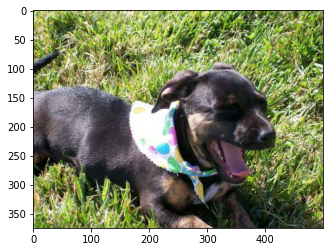

In [53]:
#display dog image
img = mpimg.imread('/content/train/dog.8316.jpg')
img = plt.imshow(img)
#plt.show()

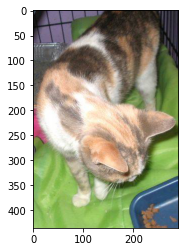

In [54]:
#display cat image
img = mpimg.imread('/content/train/cat.2211.jpg')
img = plt.imshow(img)
#plt.show()

Resizing all the images

In [48]:

#creating directory for resied images
try:
  os.mkdir('/content/image_resized')
except:
  pass

In [80]:
#from tables import file
original_folder = '/content/train/'
resized_folder = '/content/image_resized/'

for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder + filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder + filename
  img.save(newImgPath)

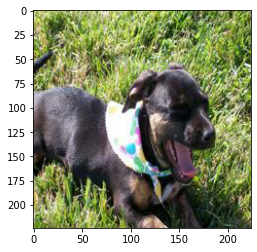

In [56]:
img = mpimg.imread('/content/image_resized/dog.8316.jpg')
imgplt = plt.imshow(img)

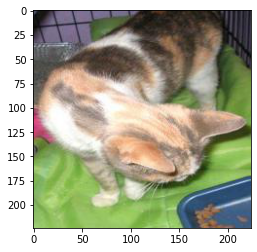

In [57]:
img = mpimg.imread('/content/image_resized/cat.2211.jpg')
img = plt.imshow(img)
plt.show()

Creating labels for resized images of dogs and cats

Cats -> 0
Dogs -> 1


In [58]:
#Assigning labels
file_names = os.listdir('/content/image_resized')
print(type(file_names))
labels = []

for i in range(2000):
  label = file_names[i][0:3]
  if label == 'dog':
    labels.append(1)
  elif label == 'cat':
    labels.append(0)

<class 'list'>


In [59]:
print(file_names)
print(labels)

['dog.9958.jpg', 'cat.904.jpg', 'dog.12349.jpg', 'cat.10143.jpg', 'cat.10590.jpg', 'dog.456.jpg', 'dog.4331.jpg', 'cat.7010.jpg', 'dog.6332.jpg', 'dog.1350.jpg', 'dog.1647.jpg', 'cat.10270.jpg', 'dog.5432.jpg', 'cat.2211.jpg', 'dog.8316.jpg', 'dog.5483.jpg', 'dog.4610.jpg', 'cat.5117.jpg', 'cat.9053.jpg', 'dog.3490.jpg', 'dog.3509.jpg', 'cat.11413.jpg', 'dog.8092.jpg', 'cat.6387.jpg', 'cat.7095.jpg', 'cat.838.jpg', 'cat.907.jpg', 'cat.9472.jpg', 'cat.449.jpg', 'cat.9429.jpg', 'cat.3214.jpg', 'dog.5525.jpg', 'cat.11276.jpg', 'dog.5466.jpg', 'dog.3703.jpg', 'cat.11719.jpg', 'cat.11727.jpg', 'cat.8508.jpg', 'cat.2512.jpg', 'cat.178.jpg', 'cat.8908.jpg', 'dog.6394.jpg', 'dog.3939.jpg', 'cat.9598.jpg', 'cat.10206.jpg', 'cat.11914.jpg', 'cat.11058.jpg', 'dog.1958.jpg', 'dog.2470.jpg', 'cat.11604.jpg', 'cat.4338.jpg', 'dog.11909.jpg', 'cat.1204.jpg', 'cat.7982.jpg', 'dog.10865.jpg', 'dog.6804.jpg', 'dog.6821.jpg', 'dog.4980.jpg', 'dog.10225.jpg', 'cat.137.jpg', 'cat.2485.jpg', 'cat.1193.jpg',

In [60]:
#counting images of dogs ans cats out of 2000 images
values, counts = np.unique(labels, return_counts = True)
print(values)
print(counts)

[0 1]
[1011  989]


Convert all resized images to numpy arrays

In [61]:
import cv2
import glob

In [62]:
image_directory = '/content/image_resized/'
  #dont forget to mention '/' at the end above
print(image_directory)
image_extension = ['png', 'jpg']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

/content/image_resized/


In [63]:
print(dog_cat_images)

[[[[ 34  33  53]
   [ 34  33  53]
   [ 34  33  53]
   ...
   [ 22  35  61]
   [ 21  34  60]
   [ 19  32  58]]

  [[ 35  34  54]
   [ 35  34  54]
   [ 35  34  54]
   ...
   [ 22  35  61]
   [ 20  33  59]
   [ 19  32  58]]

  [[ 35  34  54]
   [ 35  34  54]
   [ 36  35  55]
   ...
   [ 26  39  65]
   [ 25  38  64]
   [ 23  36  62]]

  ...

  [[ 86  64  53]
   [100  78  67]
   [100  75  65]
   ...
   [ 85  58  37]
   [ 77  53  31]
   [ 71  47  25]]

  [[ 84  63  55]
   [ 94  72  61]
   [ 95  70  60]
   ...
   [ 84  57  36]
   [ 77  53  31]
   [ 72  48  26]]

  [[ 87  66  58]
   [ 86  65  57]
   [ 89  64  54]
   ...
   [ 81  54  33]
   [ 73  49  27]
   [ 68  44  22]]]


 [[[ 64 142 209]
   [ 60 138 205]
   [ 60 138 205]
   ...
   [ 62 134 204]
   [ 39 114 183]
   [ 42 117 186]]

  [[ 64 142 209]
   [ 60 138 205]
   [ 60 138 205]
   ...
   [ 60 132 202]
   [ 47 119 189]
   [ 51 126 195]]

  [[ 63 141 208]
   [ 60 138 205]
   [ 59 137 204]
   ...
   [ 54 126 196]
   [ 50 122 192]
   [ 56 128

In [64]:
print(dog_cat_images.shape)


(2000, 224, 224, 3)


In [65]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Split

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [67]:
print(X.shape, X_test.shape, X_train.shape)

(2000, 224, 224, 3) (400, 224, 224, 3) (1600, 224, 224, 3)


In [68]:
# scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [69]:
print(X_train_scaled)

[[[[0.38039216 0.56862745 0.67843137]
   [0.35294118 0.54117647 0.65098039]
   [0.36470588 0.56078431 0.67058824]
   ...
   [0.36078431 0.42745098 0.50196078]
   [0.15294118 0.22352941 0.31372549]
   [0.16862745 0.25098039 0.3372549 ]]

  [[0.38039216 0.53333333 0.64313725]
   [0.35686275 0.51764706 0.61568627]
   [0.37254902 0.52941176 0.63921569]
   ...
   [0.33333333 0.4        0.4745098 ]
   [0.2        0.2745098  0.35686275]
   [0.12941176 0.21176471 0.29803922]]

  [[0.48235294 0.56862745 0.66666667]
   [0.4745098  0.56470588 0.65098039]
   [0.47058824 0.55686275 0.65490196]
   ...
   [0.28235294 0.34901961 0.42352941]
   [0.27058824 0.34509804 0.42745098]
   [0.08235294 0.16470588 0.25098039]]

  ...

  [[0.25882353 0.28235294 0.3254902 ]
   [0.23529412 0.25882353 0.30196078]
   [0.20392157 0.21960784 0.2627451 ]
   ...
   [0.95294118 0.96862745 0.94901961]
   [0.95294118 0.96862745 0.94901961]
   [0.94117647 0.95686275 0.9372549 ]]

  [[0.31764706 0.31764706 0.36470588]
   [0.2

#Building Neural Network

In [70]:
import tensorflow as tf
import tensorflow_hub as hub

In [71]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape = (224, 224, 3), trainable = False)

In [72]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [73]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
  )

In [74]:
model.fit(X_train_scaled, Y_train, epochs = 5 )

Epoch 1/5
50/50 [==============================] - 56s 1s/step - loss: 0.1739 - accuracy: 0.9275
Epoch 2/5
50/50 [==============================] - 51s 1s/step - loss: 0.0716 - accuracy: 0.9794
Epoch 3/5
50/50 [==============================] - 53s 1s/step - loss: 0.0533 - accuracy: 0.9850
Epoch 4/5
50/50 [==============================] - 49s 980ms/step - loss: 0.0439 - accuracy: 0.9881
Epoch 5/5
50/50 [==============================] - 49s 976ms/step - loss: 0.0384 - accuracy: 0.9900


In [75]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test loss is ', score)
print('Test Accuracy is ', acc)

13/13 [==============================] - 13s 949ms/step - loss: 0.0584 - accuracy: 0.9750
Test loss is  0.0583839938044548
Test Accuracy is  0.9750000238418579



Predictive System

Path of image to be predicted: /content/istockphoto-1402891368-170667a.jpg


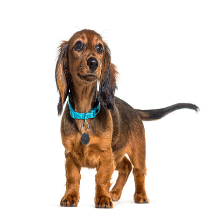

1/1 [==============================] - 0s 56ms/step
[[-2.1587667  3.3937438]]
yay! the dog is here!


In [89]:
input_image_path = input('Path of image to be predicted: ')
input_image = cv2.imread(input_image_path)
input_image_resize = cv2.resize(input_image, (224, 224))
cv2_imshow(input_image_resize)
input_image_scaled = input_image_resize / 255
input_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])
  #1 here signified that only 1 image is being checked
input_prediction = model.predict(input_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
  print('it is cat! meow!')
else:
  print('yay! the dog is here!')